In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()


Text(0, 0.5, 'Number of Job Postings')

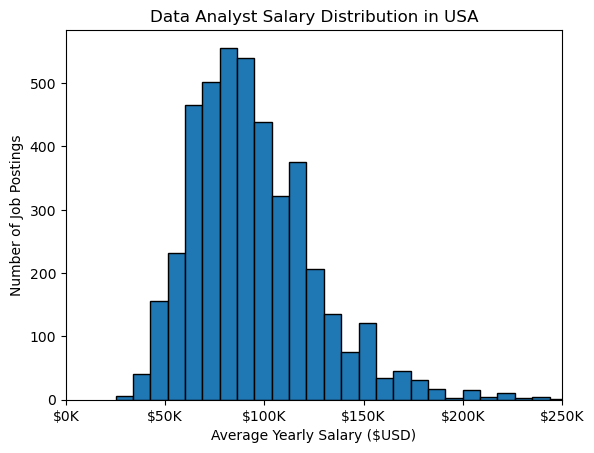

In [11]:
df_DA_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')].copy()
df_DA_USA['salary_year_avg'].plot (kind = 'hist', bins = 40, edgecolor='black')
plt.xlim(0, 250000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.title("Data Analyst Salary Distribution in USA")
plt.xlabel("Average Yearly Salary ($USD)")
plt.ylabel("Number of Job Postings")
